In [95]:
#All the external libraries I'll need 
import quandl                                                   #Use this for CoT and Futures Data
import pandas as pd                                             #Use this for Dataframes
import matplotlib.pyplot as pl                                  #Need this to visualize data
import sys
import mplfinance as mpf                                        #This makes visualizing Candle Charts Easier
import seaborn as sns                                           #This will be useful to utilize other visualization
from bs4 import BeautifulSoup                                   #Need this to scrape data off finviz
import urllib                                                   #Idk if i really need this
import os                                                       #Need this to read and store csv data
from IPython.display import HTML                                #Idk what I used this for but ill keep it anyway
import re                                                       #Needed this to find a workaround for when my scraper got CAUGHT                  
import datetime as dt                                           #This will help formatting date information
from matplotlib import style                                    #gotta give my visualizations some style
import matplotlib.dates as mdates                               #i forget what this did
import pandas_datareader.data as web                            #cool way to directly import data worth dataframing
import requests                                                 #forgot what this is used for
  
start = dt.datetime(2020,1,1)                                   #Start date constant
end = dt.datetime(2020,4,25)                                    #End date constant

In [388]:
#Create beautiful soup creation function
#This will request a URL that will be transformed into something Beautiful Soup can interpret and 
#output a nice bowl of LOVELY soup :)
###################################################################################################
def lovely_soup(url):
    hdr = {'User-Agent': 'Mozilla/4.9'}                         #Scraper didnt work using default Chrome so use Mozilla
    r = requests.get(url,headers=hdr)                           #Send GET request to URL
    soup = BeautifulSoup(r.text, 'html')                        #create beautiful soup object with text retrieved from request
    return soup


In [389]:
#Create a parser to read in a list of TICKERS and output a chart#                                  
#################################################################
def getTickerData(ticker):
    for x in ticker:
        df = web.DataReader(x, 'yahoo', start, end)                          #start and end are date_time objects
        df.to_csv('{}.csv'.format(x))                                        #We got data,   lets save it
        df = pd.read_csv('{}.csv'.format(x), parse_dates = True, index_col=0)#We saved data, lets read it
        df.reset_index(inplace = True)                                       #Make sure row index is aligned
        df.set_index('Date', inplace = True)                                 #Set row index to Date
        mpf.plot(df,type='candle', mav=(7,14), title='\n{}'.format(x))       #Visualize chart
        
####################################################################
#Create a parser to read in a SPECIFIC ticker and output it's chart#
####################################################################
def getATickerData(ticker):
    df = web.DataReader(ticker, 'yahoo', start, end)
    df.to_csv('{}.csv'.format(ticker))
    df = pd.read_csv('{}.csv'.format(ticker), parse_dates = True,index_col=0)
    df.reset_index(inplace = True)
    df.set_index('Date', inplace=True)
    mpf.plot(df,type='candle', mav = (7,14), title='\n{}'.format(ticker))
    


In [416]:
#Create a Dataframe Object to hold all stock data#
##################################################
a = 
#This DF will hold all insider selling data
selling_df = pd.DataFrame(columns = ['Ticker', 
             'Market_Cap', 
             'Price',
             'Analyst_Price',
             'Income',
             'Short_Float',
             'Treasury_Stock_Ownership',
             'Debt/Equity_Ratio',
             'Cash/Share_Ratio',
             'Next_Earnings_Date',
             'url'])

#This DF will hold all insider buying data
buying_df = pd.DataFrame(columns = ['Ticker', 
             'Market_Cap', 
             'Price',
             'Analyst_Price',
             'Income',
             'Short_Float',
             'Treasury_Stock_Ownership',
             'Debt/Equity_Ratio',
             'Cash/Share_Ratio',
             'Next_Earnings_Date',
             'url'])

#This DF will hold all unusual volume data
unusualVol_df = pd.DataFrame(columns = ['Ticker', 
             'Market_Cap', 
             'Price',
             'Analyst_Price',
             'Income',
             'Short_Float',
             'Treasury_Stock_Ownership',
             'Debt/Equity_Ratio',
             'Cash/Share_Ratio',
             'Next_Earnings_Date',
             'url'])

    

In [420]:
#Create 3 distinct URL parsers to gather data from finviz                   #
#This parser will extract URLs of all tickers within each category of stocks#
#############################################################################
#Get original Insider Selling url soup
ISsoup = lovely_soup('https://finviz.com/screener.ashx?v=210&s=it_latestsales')

#Create empty list to hold all stock urls within initial soup
ISstockFinder = []

#Create a parser to find specific quote link that references specific stock url
for link in ISsoup.find_all('a'):
    if "quote" in link.get('href'):
        ISstockFinder.append('https://finviz.com/' + link.get('href'))
print("\n")

#Get original Unusual Volume soup
UVsoup = lovely_soup('https://finviz.com/screener.ashx?v=210&s=ta_unusualvolume')
UVstockFinder = []
for link in UVsoup.find_all('a'):
    if "quote" in link.get('href'):
        UVstockFinder.append('https://finviz.com/' + link.get('href'))
print("\n")

#Get original Insider Buying soup
IBsoup = lovely_soup('https://finviz.com/screener.ashx?v=210&s=it_latestbuys')
IBstockFinder = []
for link in IBsoup.find_all('a'):
    if "quote" in link.get('href'):
        IBstockFinder.append('https://finviz.com/' + link.get('href'))
print("\n")


In [418]:
#Create a parser to extract list of HTML with info worth extracting                                                          #
#Data: Is the stock optionable? | Stock Ticker | Market Cap | Weekly & Daily Volatility | Current Price                     #    
#| Analyst Target Price | Income | Short Float | Treasury Stock Owned | Debt/Equity Ratio | Cash/Share Ratio | Earnings Date#
##############################################################################################################################
import time
def getInfo(stockList, stock_df):
    for i in range(len(stockList)):
        time.sleep(.500)
        info = " "
        stock_list = []
        stock = {'Ticker': '', 
                 'Market_Cap': '', 
                 'Price': '',
                 'Analyst_Price':'',
                 'Income': '', 
                 'Short_Float': '',
                 'Treasury_Stock_Ownership': '',
                 'Debt/Equity_Ratio': '',
                 'Cash/Share_Ratio': '',
                 'Next_Earnings_Date': '',
                 'url': ''}
        soup = lovely_soup(stockList[i])
        time.sleep(.500)
        for y in soup.find_all(string = "Optionable"):                   #Look for Optionable string in HTML
            if y.next_element.text == "Yes":                             #Check if y's value == "Yes" 
                ticker = soup.find("a", {"id": "ticker"})                #Look for key 'id' whose value is 'ticker'
                time.sleep(.500)
                getATickerData(ticker.text)
                for x in soup.find_all(id="ticker"):
                    info + "\n"
                    info += ("\t\t"+"Ticker: "+x.text)
                    info += "\n"
                    info += "\t\t" + (y)
                    info += ": "
                    info +=(y.next_element.text)
                    info += "\n"
                    t = x.text
                for mc in soup.find_all(string = "Market Cap"):
                    info += ("\t\t"+ mc + ": ")
                    info += (mc.next_element.text)
                    info += "\n"
                    market = mc.next_element.text
                for price in soup.find_all(string = "Price"):
                    info += ("\t\t"+ price + ": ")
                    info += (price.next_element.text)
                    info += "\n"
                    p = price.next_element.text
                for analyst_target in soup.find_all(string = "Target Price"):
                    info += ("\t\t"+ analyst_target + ": ")
                    info += (analyst_target.next_element.text)
                    info += "\n"
                    a = analyst_target.next_element.text
                for income in soup.find_all(string = "Income"):
                    info += ("\t\t"+ income + ": ")
                    info += (income.next_element.text)
                    info += "\n"
                    inc = income.next_element.text
                for short_float in soup.find_all(string = "Short Float"):
                    info += ("\t\t"+ short_float + ": ")
                    info += (short_float.next_element.text)
                    info += "\n"
                    sf = short_float.next_element.text
                for treasury_stock_owned in soup.find_all(string = "Inst Own"):
                    info += ("\t\t"+ treasury_stock_owned + ": ")
                    info += (treasury_stock_owned.next_element.text)
                    info += "\n"
                    tso = treasury_stock_owned.next_element.text
                for debt_equity_ratio in soup.find_all(string = "Debt/Eq"):
                    info += ("\t\t"+ debt_equity_ratio + ": ")
                    info += (debt_equity_ratio.next_element.text)
                    info += "\n"
                    de = debt_equity_ratio.next_element.text
                for cash_per_share_ratio in soup.find_all(string = "Cash/sh"):
                    info += ("\t\t"+ cash_per_share_ratio + ": ")
                    info += (cash_per_share_ratio.next_element.text)
                    info += "\n"
                    cs= cash_per_share_ratio.next_element.text
                for earnings_date in soup.find_all(string = "Earnings"):
                    info += ("\t\t"+ earnings_date + ": ")
                    info += (earnings_date.next_element.text)
                    info += "\n"
                    e = earnings_date.next_element.text
                stock.update({
                 'Ticker': t,
                 'Market_Cap' : market, 
                 'Price': p,
                 'Analyst_Price': a,
                 'Income':inc,
                 'Short_Float':sf,
                 'Treasury_Stock_Ownership': tso,
                 'Debt/Equity_Ratio': de,
                 'Cash/Share_Ratio': cs,
                 'Next_Earnings_Date': e,
                 'url': stockList[i]})
                stock_list.append(stock)
                stock_df = stock_df.append(pd.DataFrame(stock_list))     #make sure to do DF = DF.CHANGE to save DF's change
                print(info)
                print(get_InsiderTableDataFrame(stockList[i]).iloc[1:10,1:6 ])
                info = ' ' 
            else:
                pass
    return(stock_df)   

##############################################################################################################################
#Create a finviz Insider Transaction Parser! 
#Captures all Insider Transaction data and puts it in a nice Dataframe!
##############################################################################################################################
def get_InsiderTableDataFrame(url):
    
    test = lovely_soup(url)
    #Find all tr objects with Insider Transaction Data 
    tr = test.find_all("tr", {"valign" : "top"})
    is_trades = []

    for x in tr:
    #Since tr holds all of the insider data in one table, td will give us all mini-tables with data we want
        for y in x.find_all("td"):
            is_trades.append(y.text)
        
    name, date, transaction, cost, shares, value, total_shares = [],[],[],[],[],[],[]

    for index, data in enumerate(is_trades[1:]):
        if((index % 9) == 0 ):
            name.append(data)
        elif((index %9) == 2):
            date.append(data)
        elif((index%9) == 3):
            transaction.append(data)
        elif((index %9) == 4):
            cost.append(data)
        elif((index%9) == 5):
            shares.append(data)
        elif((index %9) == 6):
            value.append(data)
        elif((index%9) == 7):
            total_shares.append(data)
            
    stock_insider = pd.DataFrame({
                 'Name': name,
                 'Date' : date, 
                 'Transaction': transaction,
                 'Cost': cost,
                 'Shares':shares,
                 'Value':value,
                 'Total_Shares': total_shares,
                 })
    
    return(stock_insider)

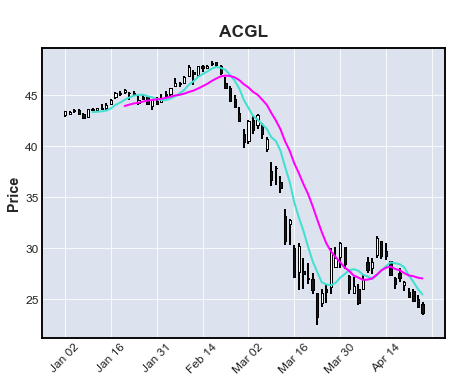

 		Ticker: ACGL
		Optionable: Yes
		Market Cap: 9.79B
		Price: 25.91
		Target Price: 36.11
		Income: 1.29B
		Short Float: 0.59%
		Inst Own: 88.20%
		Debt/Eq: 0.22
		Cash/sh: 2.19
		Earnings: May 04 AMC

     Date      Transaction   Cost   Shares      Value
1  May 14             Sale  21.20  100,000  2,119,940
2  May 13              Buy  22.16    1,000     22,159
3  May 07             Sale  24.28  100,000  2,427,830
4  May 06              Buy  23.72    1,000     23,718
5  May 05  Option Exercise   8.34   90,000    750,303
6  Feb 24             Sale  45.96   40,000  1,838,280
7  Feb 19             Sale  48.16    6,990    336,647
8  Feb 14  Option Exercise  10.64    9,000     95,790
9  Feb 13  Option Exercise   8.34   49,500    412,667


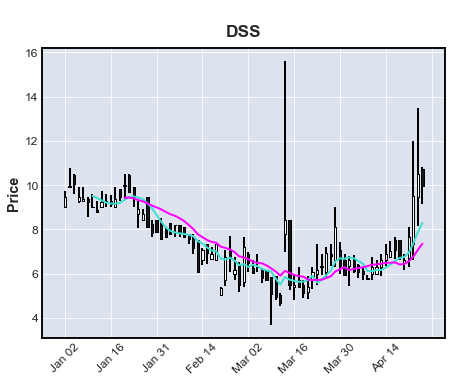

 		Ticker: DSS
		Optionable: Yes
		Market Cap: 17.04M
		Price: 8.71
		Target Price: -
		Income: -2.90M
		Short Float: 3.75%
		Inst Own: 1.00%
		Debt/Eq: 0.26
		Cash/sh: 0.58
		Earnings: May 26 AMC

     Date Transaction  Cost     Shares      Value
1  Apr 17         Buy  0.09  1,000,000     85,000
2  Apr 15         Buy  0.08    189,080     14,181
3  Apr 08         Buy  0.08    576,000     43,954
4  Apr 07         Buy  0.07    313,000     21,910
5  Apr 06         Buy  0.07    328,094     22,967
6  Apr 03         Buy  0.07    161,250     11,288
7  Nov 01         Buy  0.30  6,000,000  1,822,200
8  Jun 10         Buy  0.50  2,000,000  1,000,000
9  Jun 06         Buy  0.48      1,181        562


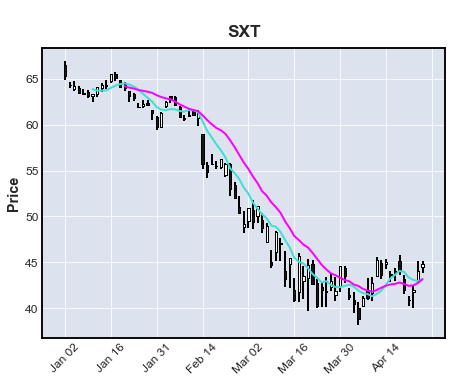

 		Ticker: SXT
		Optionable: Yes
		Market Cap: 1.88B
		Price: 46.21
		Target Price: 59.50
		Income: 70.00M
		Short Float: 2.65%
		Inst Own: 91.90%
		Debt/Eq: 0.72
		Cash/sh: 0.55
		Earnings: Apr 29 BMO

     Date Transaction   Cost Shares    Value
1  Feb 19         Buy  56.06  1,000   56,060
2  Feb 18         Buy  55.65  1,000   55,650
3  Feb 18         Buy  55.65  2,000  111,300


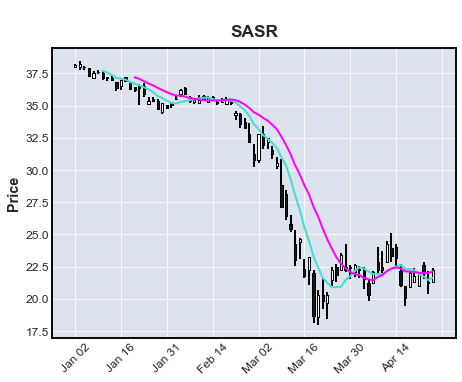

 		Ticker: SASR
		Optionable: Yes
		Market Cap: 1.01B
		Price: 23.43
		Target Price: 31.33
		Income: 96.10M
		Short Float: 1.29%
		Inst Own: 59.50%
		Debt/Eq: 0.18
		Cash/sh: 5.55
		Earnings: Apr 23 BMO

     Date      Transaction   Cost Shares    Value
1  May 19              Buy  22.08  5,000  110,396
2  May 14              Buy  20.00  1,300   26,000
3  May 12              Buy  20.79  3,580   74,410
4  Mar 12              Buy  23.82  4,198   99,985
5  Mar 11  Option Exercise  20.26    597   12,095
6  Mar 11              Buy  25.98  9,621  249,996
7  Mar 11              Buy  26.06  1,000   26,063
8  Mar 11             Sale  26.53    597   15,836
9  Mar 10              Buy  26.65  2,000   53,300


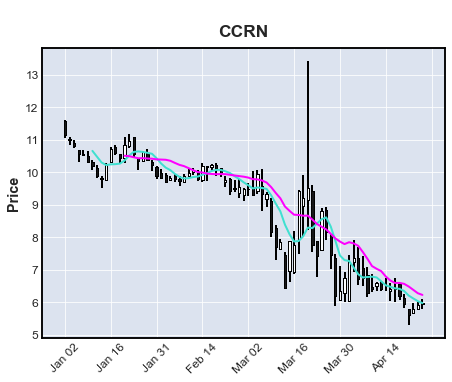

 		Ticker: CCRN
		Optionable: Yes
		Market Cap: 214.52M
		Price: 6.22
		Target Price: -
		Income: -58.00M
		Short Float: 3.43%
		Inst Own: 97.10%
		Debt/Eq: 0.00
		Cash/sh: 0.35
		Earnings: May 07 AMC

     Date Transaction  Cost  Shares    Value
1  May 19         Buy  5.89   5,083   29,939
2  May 15         Buy  5.15  10,000   51,500
3  May 15         Buy  5.16   4,800   24,768
4  May 14         Buy  4.69   3,000   14,070
5  May 14         Buy  4.59   8,000   36,720
6  May 14         Buy  4.67  10,712   50,025
7  May 14         Buy  4.62  23,147  106,939
8  Mar 13         Buy  6.91   1,000    6,910
9  Mar 11         Buy  7.65   5,000   38,250


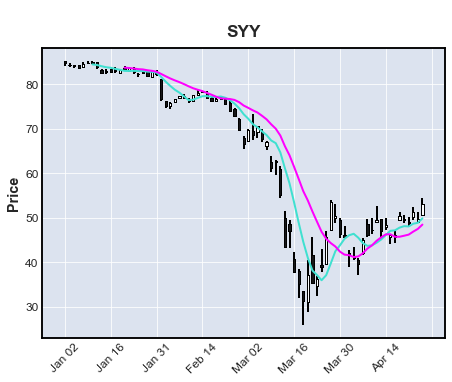

 		Ticker: SYY
		Optionable: Yes
		Market Cap: 26.28B
		Price: 52.83
		Target Price: 58.00
		Income: 1.37B
		Short Float: 2.80%
		Inst Own: 82.30%
		Debt/Eq: 5.35
		Cash/sh: 4.38
		Earnings: May 05 BMO

     Date      Transaction   Cost   Shares       Value
1  May 18              Buy  51.79  103,700   5,370,726
2  May 15              Buy  47.42  600,000  28,449,155
3  May 15              Buy  47.42  600,000  28,449,155
4  Jan 10  Option Exercise  38.89    2,292      89,136
5  Jan 10             Sale  85.03    2,292     194,889
6  Jan 09  Option Exercise  38.89      900      35,001
7  Jan 09             Sale  85.06      900      76,554
8  Jan 06  Option Exercise  38.89   35,000   1,361,150
9  Jan 06  Option Exercise  33.40   33,633   1,123,342


In [421]:
buying_df = buying_df.append(getInfo(IBstockFinder, buying_df))

In [371]:
buying_df.to_csv('Buying_data.csv')
buying_df

,Ticker,Market_Cap,Price,Analyst_Price,Income,Short_Float,Treasury_Stock_Ownership,Debt/Equity_Ratio,Cash/Share_Ratio,Next_Earnings_Date,url
0,SYY,26.28B,51.38,58.00,1.37B,2.80%,82.30%,5.35,4.38,May 05 BMO,https://finviz.com/quote.ashx?t=SYY&ty=c&p=d&b=1
0,MGLN,1.75B,70.10,70.33,73.70M,2.64%,-,0.51,11.25,May 11 BMO,https://finviz.com/quote.ashx?t=MGLN&ty=c&p=d&b=1
0,AES,8.57B,12.81,17.42,292.00M,0.87%,96.20%,8.31,2.80,May 07 BMO,https://finviz.com/quote.ashx?t=AES&ty=c&p=d&b=1
0,BPFH,525.63M,6.40,8.63,61.40M,0.99%,94.90%,0.13,2.44,Apr 29 AMC,https://finviz.com/quote.ashx?t=BPFH&ty=c&p=d&b=1
0,ASPS,130.75M,8.54,-,-302.40M,11.24%,59.40%,-,7.86,Apr 30 BMO,https://finviz.com/quote.ashx?t=ASPS&ty=c&p=d&b=1
0,CATM,971.54M,21.72,32.80,50.50M,12.57%,-,4.29,13.72,May 08 BMO,https://finviz.com/quote.ashx?t=CATM&ty=c&p=d&b=1


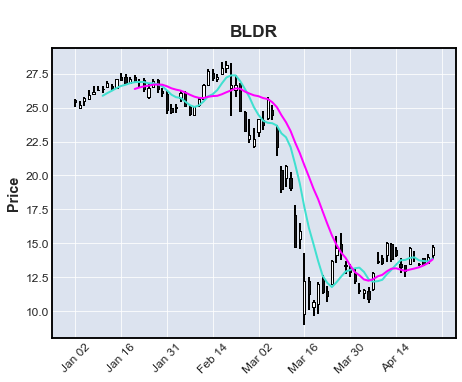

 		Ticker: BLDR
		Optionable: Yes
		Market Cap: 2.06B
		Price: 17.71
		Target Price: 21.50
		Income: 194.90M
		Short Float: 2.96%
		Inst Own: 97.20%
		Debt/Eq: 1.88
		Cash/sh: 1.41
		Earnings: Apr 30 AMC

     Date      Transaction   Cost   Shares      Value
1  May 15             Sale  16.05   45,903    736,743
2  Nov 05  Option Exercise   7.67   12,000     92,040
3  Nov 05             Sale  24.53   12,000    294,360
4  Aug 09             Sale  20.20    4,328     87,426
5  Aug 08             Sale  20.05   87,657  1,757,523
6  Aug 07             Sale  19.48    2,351     45,797
7  Aug 06             Sale  18.88  125,408  2,367,703
8  May 23             Sale  15.22    6,000     91,320
9  May 23             Sale  15.08   11,133    167,886


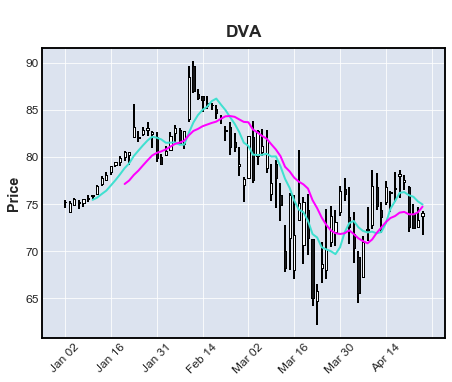

 		Ticker: DVA
		Optionable: Yes
		Market Cap: 9.63B
		Price: 80.21
		Target Price: 85.17
		Income: 816.10M
		Short Float: 4.65%
		Inst Own: -
		Debt/Eq: 4.41
		Cash/sh: 11.58
		Earnings: May 05 AMC

     Date      Transaction   Cost   Shares       Value
1  May 12             Sale  80.89   62,000   5,015,000
2  May 11  Option Exercise  75.42  145,522  10,975,269
3  May 11             Sale  81.28   62,000   5,039,391
4  May 11             Sale  81.18    5,390     437,537
5  Mar 20             Sale  71.25      625      44,531
6  Mar 02             Sale  80.74    7,694     621,214
7  Feb 27             Sale  80.49   11,806     950,265
8  Feb 26             Sale  80.93   20,000   1,618,600


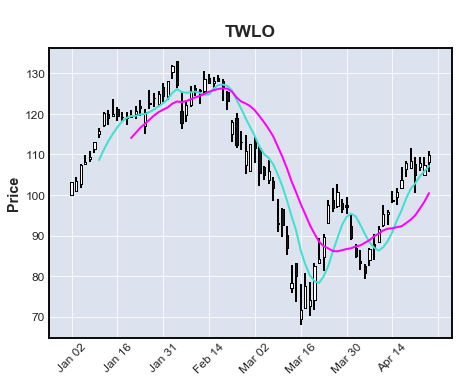

 		Ticker: TWLO
		Optionable: Yes
		Market Cap: 26.02B
		Price: 183.24
		Target Price: 129.05
		Income: -365.40M
		Short Float: 12.84%
		Inst Own: 98.80%
		Debt/Eq: 0.11
		Cash/sh: 12.98
		Earnings: May 06 AMC

     Date      Transaction    Cost  Shares      Value
1  May 15             Sale  188.41   1,252    235,889
2  May 15             Sale  188.59   5,108    963,329
3  May 15             Sale  187.80  35,000  6,572,947
4  May 15             Sale  189.13   3,486    659,309
5  May 15             Sale  188.90   7,693  1,453,184
6  May 15             Sale  190.68   2,010    383,274
7  May 15             Sale  189.92   1,500    284,876
8  May 13  Option Exercise   76.63  54,928  4,209,133
9  May 13             Sale  187.62   9,000  1,688,620


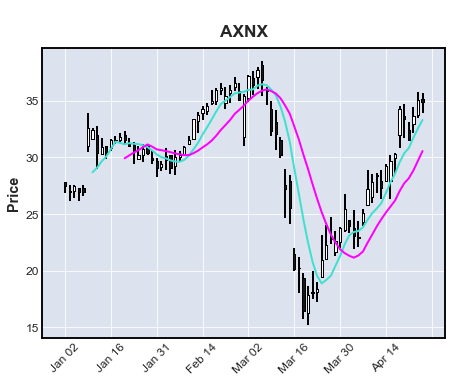

 		Ticker: AXNX
		Optionable: Yes
		Market Cap: 1.54B
		Price: 39.82
		Target Price: 43.63
		Income: -81.40M
		Short Float: 15.00%
		Inst Own: 90.70%
		Debt/Eq: 0.12
		Cash/sh: 4.12
		Earnings: May 05 AMC

     Date      Transaction   Cost  Shares      Value
1  May 19             Sale  40.05  15,000    600,777
2  May 18  Option Exercise   1.32  15,000     19,800
3  May 18             Sale  37.26  15,000    558,842
4  May 15  Option Exercise   1.01  30,000     30,325
5  May 15             Sale  35.13  30,000  1,053,993
6  May 14  Option Exercise   0.98  20,000     19,600
7  May 14             Sale  34.19  20,000    683,707
8  May 11  Option Exercise   0.98  30,000     29,400
9  May 11             Sale  34.86  30,000  1,045,943


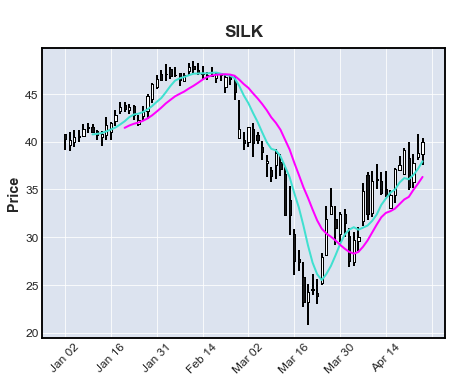

 		Ticker: SILK
		Optionable: Yes
		Market Cap: 1.21B
		Price: 37.46
		Target Price: 47.50
		Income: -37.80M
		Short Float: 7.33%
		Inst Own: -
		Debt/Eq: 0.62
		Cash/sh: 2.80
		Earnings: Apr 30 AMC

     Date      Transaction   Cost     Shares        Value
1  May 15             Sale  38.61      9,600      370,622
2  May 11  Option Exercise   1.38     20,044       27,661
3  May 11             Sale  37.63     20,044      754,250
4  May 05             Sale  39.00  4,885,078  190,518,042
5  May 05             Sale  39.00  4,885,078  190,518,042
6  May 01  Option Exercise   1.46     13,270       19,374
7  May 01             Sale  41.03     13,270      544,475
8  Apr 15  Option Exercise   1.60     19,100       30,560
9  Apr 15             Sale  33.67     19,100      643,009


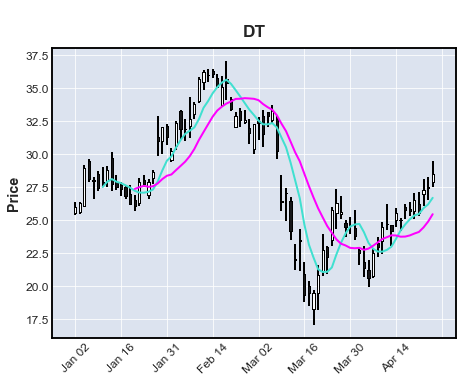

 		Ticker: DT
		Optionable: Yes
		Market Cap: 10.24B
		Price: 36.49
		Target Price: 31.07
		Income: -418.00M
		Short Float: 4.23%
		Inst Own: 93.60%
		Debt/Eq: 0.64
		Cash/sh: 0.75
		Earnings: May 12 BMO

     Date Transaction   Cost  Shares      Value
1  May 15        Sale  32.97  55,000  1,813,251
2  May 11        Sale  33.07   7,400    244,713
3  Apr 22        Sale  28.00  30,000    840,000
4  Apr 15        Sale  24.79  55,000  1,363,588
5  Apr 14        Sale  25.00   7,400    185,000
6  Apr 13        Sale  23.82  60,000  1,429,295
7  Mar 24        Sale  25.00  24,423    610,575
8  Mar 19        Sale  20.88  21,203    442,679
9  Mar 17        Sale  20.06   4,601     92,284


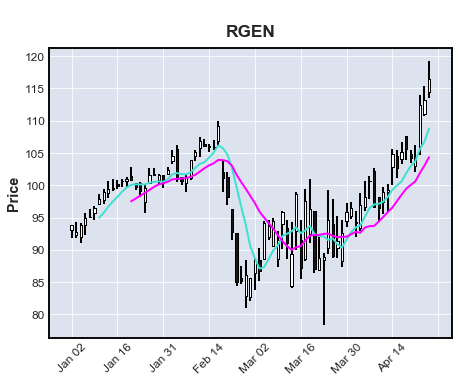

 		Ticker: RGEN
		Optionable: Yes
		Market Cap: 6.66B
		Price: 135.62
		Target Price: 111.29
		Income: 23.20M
		Short Float: 5.20%
		Inst Own: 85.10%
		Debt/Eq: 0.00
		Cash/sh: 10.78
		Earnings: May 06 BMO

     Date      Transaction    Cost  Shares      Value
1  May 15             Sale  140.69     435     61,200
2  May 15             Sale  140.43     660     92,684
3  May 13  Option Exercise   30.75  12,194    374,956
4  May 13  Option Exercise   33.26   8,000    266,040
5  May 13             Sale  128.74  15,394  1,981,875
6  May 13             Sale  127.80   8,000  1,022,373
7  Apr 22  Option Exercise   42.07   1,652     69,500
8  Apr 22             Sale  109.99   2,688    295,653
9  Apr 21  Option Exercise    3.30  11,800     38,940


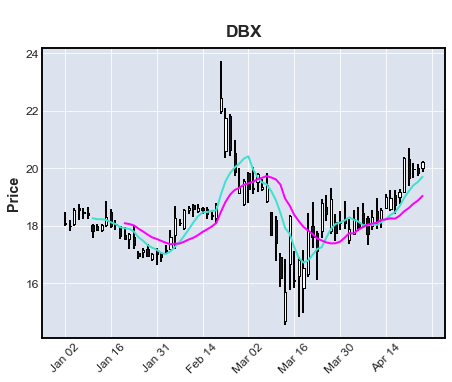

 		Ticker: DBX
		Optionable: Yes
		Market Cap: 8.64B
		Price: 21.75
		Target Price: 27.73
		Income: -5.70M
		Short Float: 3.98%
		Inst Own: 71.30%
		Debt/Eq: 0.28
		Cash/sh: 2.77
		Earnings: May 07 AMC

     Date Transaction   Cost   Shares       Value
1  May 08        Sale  22.63   10,000     226,298
2  May 08        Sale  22.50    1,000      22,500
3  Apr 28        Sale  21.08   41,250     869,624
4  Apr 20        Sale  20.10  498,900  10,030,085
5  Apr 20        Sale  19.18    2,000      38,360
6  Apr 16        Sale  18.71  125,000   2,338,600
7  Apr 01        Sale  17.85  125,000   2,231,613
8  Mar 20        Sale  18.00    2,000      36,000
9  Mar 19        Sale  17.06   19,360     330,231


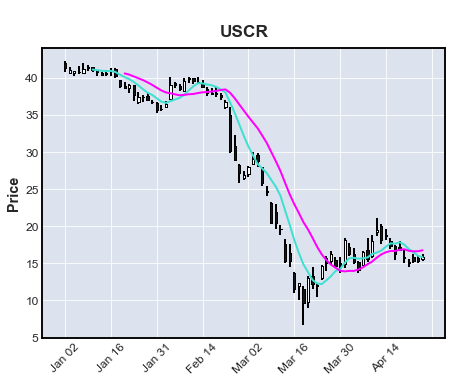

 		Ticker: USCR
		Optionable: Yes
		Market Cap: 295.23M
		Price: 17.71
		Target Price: 20.00
		Income: 14.50M
		Short Float: 10.18%
		Inst Own: 99.00%
		Debt/Eq: 2.30
		Cash/sh: 1.58
		Earnings: May 05 BMO

     Date      Transaction   Cost  Shares    Value
1  Apr 20             Sale  15.75     250    3,938
2  Apr 03  Option Exercise   0.00  23,440        0
3  Mar 20              Buy  13.00   1,100   14,300
4  Mar 19             Sale   9.74     250    2,435
5  Mar 13              Buy  15.75   5,000   78,750
6  Mar 09              Buy  22.34   4,300   96,062
7  Mar 06              Buy  24.61  10,700  263,327
8  Mar 05              Buy  25.76   4,000  103,040
9  Mar 01  Option Exercise   0.00   1,400        0


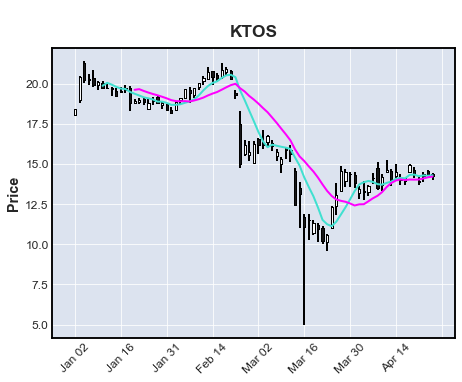

 		Ticker: KTOS
		Optionable: Yes
		Market Cap: 1.74B
		Price: 16.35
		Target Price: 21.39
		Income: 7.30M
		Short Float: 6.84%
		Inst Own: 86.40%
		Debt/Eq: 0.58
		Cash/sh: 1.49
		Earnings: May 07 AMC

     Date      Transaction   Cost  Shares    Value
1  May 18  Option Exercise   4.98   8,000   39,840
2  May 15             Sale  15.25   3,350   51,084
3  Apr 21             Sale  13.98  10,000  139,799
4  Apr 21             Sale  14.05   7,600  106,750
5  Apr 20  Option Exercise   0.00  11,250        0
6  Apr 17             Sale  15.00   3,350   50,250
7  Apr 07             Sale  15.00   3,350   50,250
8  Apr 06             Sale  14.03   6,000   84,181
9  Mar 25             Sale  13.00  10,000  130,000


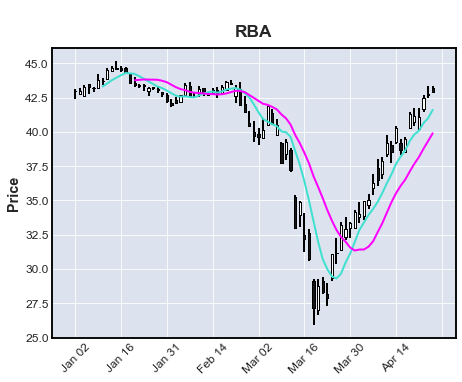

 		Ticker: RBA
		Optionable: Yes
		Market Cap: 4.46B
		Price: 41.00
		Target Price: 42.19
		Income: 153.70M
		Short Float: 1.43%
		Inst Own: 84.90%
		Debt/Eq: 0.81
		Cash/sh: 2.66
		Earnings: May 07 AMC

     Date      Transaction   Cost  Shares      Value
1  May 13  Option Exercise  24.84  10,900    270,810
2  May 13             Sale  41.60  13,026    541,837
3  May 12  Option Exercise  26.00  42,902  1,115,409
4  May 12             Sale  42.85  42,902  1,838,351
5  Mar 09  Option Exercise  24.84  16,961    421,311
6  Mar 09             Sale  40.49  16,961    686,751
7  Mar 04  Option Exercise  24.07  22,565    543,140
8  Mar 04             Sale  41.00  22,565    925,165
9  Sep 05             Sale  39.80   2,428     96,634


In [414]:
#This will layout all stock charts and information pertaining to each stock for Insider Selling
selling_df = selling_df.append(getInfo(ISstockFinder, selling_df))

In [375]:
selling_df = selling_df.drop_duplicates(inplace=False)
selling_df.set_index('Ticker')
selling_df.to_csv('Selling_data.csv')
selling_df

,Ticker,Market_Cap,Price,Analyst_Price,Income,Short_Float,Treasury_Stock_Ownership,Debt/Equity_Ratio,Cash/Share_Ratio,Next_Earnings_Date,url
0,AXNX,1.54B,39.82,43.63,-81.40M,15.00%,90.70%,0.12,4.12,May 05 AMC,https://finviz.com/quote.ashx?t=AXNX&ty=c&p=d&b=1
0,SILK,1.21B,37.46,47.50,-37.80M,7.33%,-,0.62,2.80,Apr 30 AMC,https://finviz.com/quote.ashx?t=SILK&ty=c&p=d&b=1
0,DT,10.24B,36.49,31.07,-418.00M,4.23%,93.60%,0.64,0.75,May 12 BMO,https://finviz.com/quote.ashx?t=DT&ty=c&p=d&b=1
0,RGEN,6.66B,135.62,111.29,23.20M,5.20%,85.10%,0.00,10.78,May 06 BMO,https://finviz.com/quote.ashx?t=RGEN&ty=c&p=d&b=1
0,TWLO,26.02B,183.24,129.05,-365.40M,12.84%,98.80%,0.11,12.98,May 06 AMC,https://finviz.com/quote.ashx?t=TWLO&ty=c&p=d&b=1
0,DBX,8.64B,21.75,27.73,-5.70M,3.98%,71.30%,0.28,2.77,May 07 AMC,https://finviz.com/quote.ashx?t=DBX&ty=c&p=d&b=1
0,USCR,295.23M,17.71,20.00,14.50M,10.18%,99.00%,2.30,1.58,May 05 BMO,https://finviz.com/quote.ashx?t=USCR&ty=c&p=d&b=1
0,KTOS,1.74B,16.35,21.39,7.30M,6.84%,86.40%,0.58,1.49,May 07 AMC,https://finviz.com/quote.ashx?t=KTOS&ty=c&p=d&b=1
0,RBA,4.46B,41.00,42.19,153.70M,1.43%,84.90%,0.81,2.66,May 07 AMC,https://finviz.com/quote.ashx?t=RBA&ty=c&p=d&b=1
0,WATT,82.35M,1.95,-,-36.00M,13.45%,17.30%,0.00,0.47,May 06 AMC,https://finviz.com/quote.ashx?t=WATT&ty=c&p=d&b=1


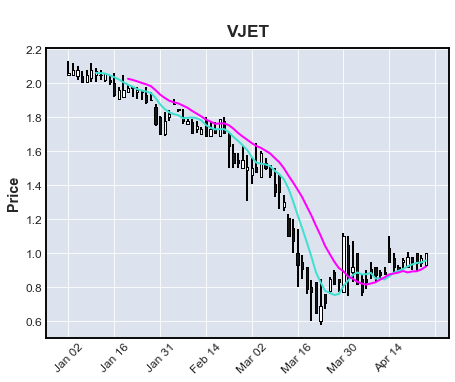

 		Ticker: VJET
		Optionable: Yes
		Market Cap: 23.40M
		Price: 1.09
		Target Price: -
		Income: -15.40M
		Short Float: -
		Inst Own: 20.80%
		Debt/Eq: 0.64
		Cash/sh: 0.59
		Earnings: May 07 AMC

Empty DataFrame
Columns: [Date, Transaction, Cost, Shares, Value]
Index: []


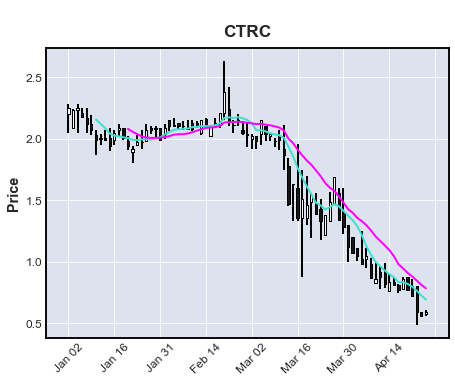

 		Ticker: CTRC
		Optionable: Yes
		Market Cap: 17.53M
		Price: 0.31
		Target Price: -
		Income: -274.10M
		Short Float: 1.19%
		Inst Own: 75.20%
		Debt/Eq: -
		Cash/sh: 0.34
		Earnings: -

     Date      Transaction  Cost  Shares Value
1  Dec 31  Option Exercise  0.00  23,529     0


In [419]:
unusualVol_df = unusualVol_df.append(getInfo(UVstockFinder, unusualVol_df))

In [385]:
unusualVol_df = unusualVol_df.drop_duplicates(inplace = False)
unusualVol_df.set_index("Ticker")
unusualVol_df.to_csv('UnusualVol_data.csv')
unusualVol_df

,Ticker,Market_Cap,Price,Analyst_Price,Income,Short_Float,Treasury_Stock_Ownership,Debt/Equity_Ratio,Cash/Share_Ratio,Next_Earnings_Date,url
0,VJET,23.40M,1.09,-,-15.40M,-,20.80%,0.64,0.59,May 07 AMC,https://finviz.com/quote.ashx?t=VJET&ty=c&p=d&b=1
0,CTRC,17.53M,0.31,-,-274.10M,1.19%,75.20%,-,0.34,-,https://finviz.com/quote.ashx?t=CTRC&ty=c&p=d&b=1


In [408]:
#lets do some math functions

def f(x):
    return(np.exp(x))

        

     Date      Transaction   Cost   Shares       Value
1  May 18              Buy  51.79  103,700   5,370,726
2  May 15              Buy  47.42  600,000  28,449,155
3  May 15              Buy  47.42  600,000  28,449,155
4  Jan 10  Option Exercise  38.89    2,292      89,136
5  Jan 10             Sale  85.03    2,292     194,889
6  Jan 09  Option Exercise  38.89      900      35,001
7  Jan 09             Sale  85.06      900      76,554
8  Jan 06  Option Exercise  38.89   35,000   1,361,150
9  Jan 06  Option Exercise  33.40   33,633   1,123,342
     Date      Transaction   Cost Shares    Value
1  Mar 05  Option Exercise   0.00  2,287        0
2  Mar 03  Option Exercise   0.00  2,837        0
3  Mar 03  Option Exercise   0.00  1,844        0
4  Mar 03  Option Exercise   0.00  4,365        0
5  Mar 03  Option Exercise   0.00  5,675        0
6  Jan 02             Sale  78.53    200   15,706
7  Dec 30             Sale  78.50    104    8,164
8  Dec 27             Sale  78.54    606   47,597
